In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df.drop(["sepal length (cm)", "sepal width (cm)"], axis=1, inplace=True)
df

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [7]:
df["target"] = iris.target
df

,petal length (cm),petal width (cm),target
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


Text(0, 0.5, 'Petal width (cm)')

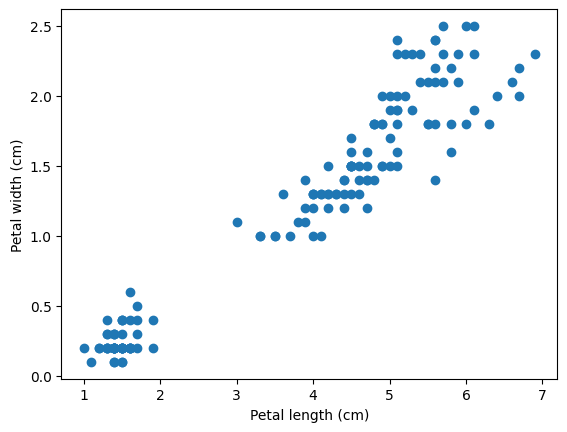

In [14]:
plt.scatter(df["petal length (cm)"],df["petal width (cm)"])
plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')

In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [16]:
df["cluster"] = y_predicted
df

,petal length (cm),petal width (cm),target,cluster
0,1.4,0.2,0,1
1,1.4,0.2,0,1
2,1.3,0.2,0,1
3,1.5,0.2,0,1
4,1.4,0.2,0,1
...,...,...,...,...
145,5.2,2.3,2,0
146,5.0,1.9,2,0
147,5.2,2.0,2,0
148,5.4,2.3,2,0


In [17]:
km.cluster_centers_

array([[5.62608696, 2.04782609],
       [1.462     , 0.246     ],
       [4.29259259, 1.35925926]])

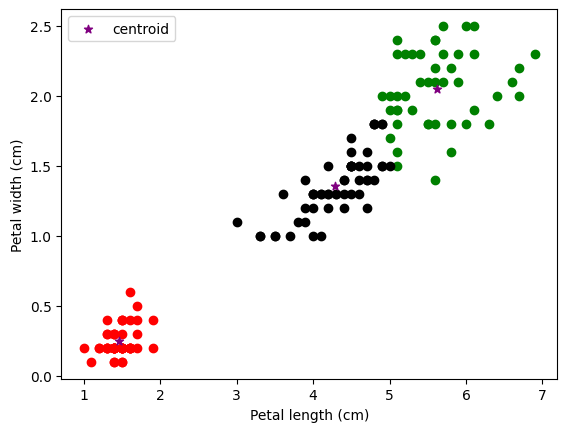

In [22]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["petal length (cm)"],df1['petal width (cm)'],color='green')
plt.scatter(df2["petal length (cm)"],df2['petal width (cm)'],color='red')
plt.scatter(df3["petal length (cm)"],df3['petal width (cm)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

In [26]:
scaler = MinMaxScaler()

scaler.fit(df[["petal length (cm)"]])
df["petal length (cm)"] = scaler.transform(df[["petal length (cm)"]])

scaler.fit(df[["petal width (cm)"]])
df["petal width (cm)"] = scaler.transform(df[["petal width (cm)"]])
df


,petal length (cm),petal width (cm),target,cluster
0,0.067797,0.041667,0,1
1,0.067797,0.041667,0,1
2,0.050847,0.041667,0,1
3,0.084746,0.041667,0,1
4,0.067797,0.041667,0,1
...,...,...,...,...
145,0.711864,0.916667,2,0
146,0.677966,0.750000,2,0
147,0.711864,0.791667,2,0
148,0.745763,0.916667,2,0


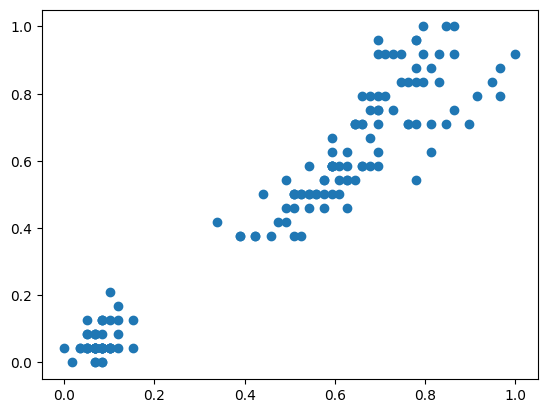

In [27]:
plt.scatter(df["petal length (cm)"], df["petal width (cm)"])

In [28]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[["petal length (cm)","petal width (cm)"]])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [29]:
km.cluster_centers_

array([[0.07830508, 0.06083333],
       [0.55867014, 0.51041667],
       [0.7740113 , 0.81510417]])

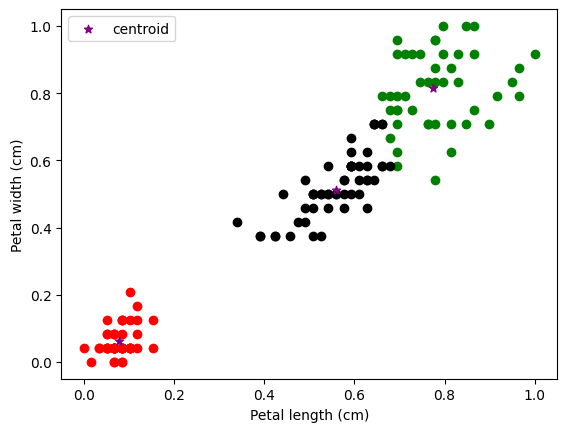

In [30]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1["petal length (cm)"],df1['petal width (cm)'],color='green')
plt.scatter(df2["petal length (cm)"],df2['petal width (cm)'],color='red')
plt.scatter(df3["petal length (cm)"],df3['petal width (cm)'],color='black')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()

In [31]:
sse = []
k_rng = range(1,10)
for k in k_rng:
        km = KMeans(n_clusters=k)
        km.fit(df[["petal length (cm)","petal width (cm)"]])
        sse.append(km.inertia_)

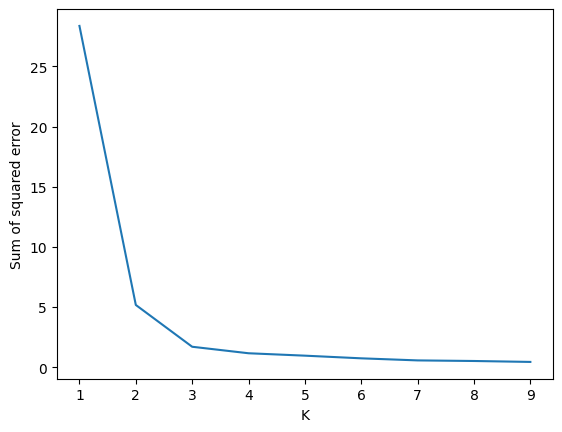

In [32]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)